# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv('Employee.csv')

In [9]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [11]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [10]:
df = employee.groupby('Department')['Salary'].mean()
df

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [18]:
#It is doing the average of the salaries by default
df = employee.pivot_table(index='Department', values='Salary')
df

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [24]:
df = employee.pivot_table(index='Department', columns = 'Title', values='Salary')
df

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [26]:
df = employee.pivot_table(index=['Department', 'Years'], columns = 'Title', values='Salary')
df

Title               VP  analyst  associate
Department Years                          
HR         2       NaN     30.0        NaN
           4       NaN     35.0        NaN
           8      70.0      NaN        NaN
IT         1       NaN     35.0        NaN
           2       NaN     30.0        NaN
           7       NaN      NaN       60.0
           8      70.0      NaN        NaN
Sales      2       NaN      NaN       55.0
           3       NaN      NaN       55.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [33]:
df = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=[np.mean, "count"])
df


mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [48]:
df = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=[np.median, np.min, np.max, np.std])
df


median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

We obtain a NaN value on the standard deviation column for those categories with only one element.

#### Based on your comments, fill the missing values with an appropriate value.

In [46]:
df.fillna(0)

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [49]:
df = employee.pivot_table(index='Department', values='Salary', aggfunc=['count', np.sum])
df


,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [54]:
df = employee.pivot_table(index=['Department', 'Title'], values=['Years', 'Salary'], aggfunc={'Years': np.sum, 'Salary': np.mean})
df

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [75]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [56]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [65]:
#List of means
means = [round(fitbit[column].mean(),2) for column in list(fitbit.columns[1:])]

#List of medians
medians = [round(fitbit[column].median(),4) for column in list(fitbit.columns[1:])]

#List of standard deviations
st_devs = [round(fitbit[column].std(),4) for column in list(fitbit.columns[1:])]

#Creating a new data frame with the statistics values
fitbit_statistics = pd.DataFrame({'Means': means, 'Medians': medians, 'Standard_Deviations': st_devs})

#Giving the corresponding names to columns
new_names = {
    0: 'Calorie burned',
    1: 'Steps',
    2: 'Distance',
    3: 'Floors',
    4: 'Minutes Sedentary',
    5: 'Minutes Lightly Active',
    6: 'Minutes Fairly Active',
    7: 'Minutes Very Active',
    8: 'Activity Calories',
    9: 'MinutesOfSleep',
    10: 'MinutesOfBeingAwake',
    11: 'NumberOfAwakings',
    12: 'LengthOfRestInMinutes'
}
fitbit_statistics = fitbit_statistics.rename(index=new_names)

fitbit_statistics


,Means,Medians,Standard_Deviations
Calorie burned,2741.50,2974.00,916.3070
Steps,10121.59,10413.00,5594.8362
Distance,8.55,8.29,3.4099
Floors,11.72,11.00,10.3374
Minutes Sedentary,563.93,663.00,294.7931
Minutes Lightly Active,236.41,226.00,86.5314
Minutes Fairly Active,26.16,24.00,20.3195
Minutes Very Active,35.72,29.00,31.0067
Activity Calories,2044.15,1553.00,2041.2672
MinutesOfSleep,290.48,337.00,154.7523


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [72]:
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
correlation

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [77]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

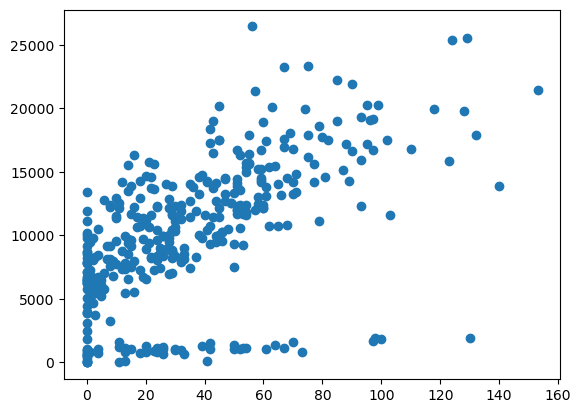

In [78]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

- There are several values where the user is doing steps but not spending any minute very active.
- There are several points with a considerable amount of minutes very active but not so many steps done.
- The general tendency indicates that the more minutes very active the more steps one gets.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [84]:
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

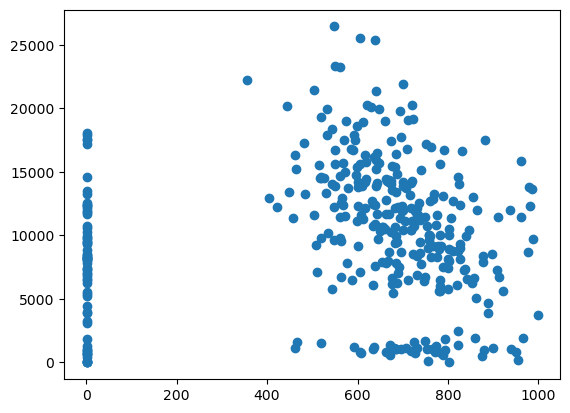

In [87]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

- There are several days where a lot of steps have been done with no sedentary minutes.
- The correlation coefficient suggests that therre is not a linear relation between the two variables.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [89]:
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
correlation

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

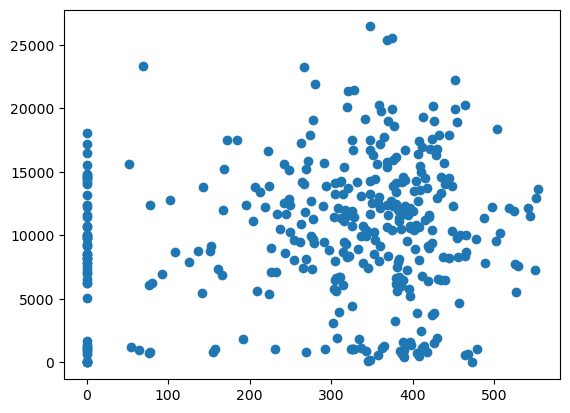

In [90]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

- According to the plot, it does not look like the two variables are related in any way.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [92]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit[column]

correlation_matrix = cor_fit.corr()

correlation_matrix

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [94]:
correlation_matrix.sort_values('Steps', ascending = False)


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


- I can see that the variable with respect to which "Steps" is more correlated to is "Minutes Very Active".
- On the other hand, it looks like minutes sedentary is the variable it is less correlated to is "Minutes Sdentary". 

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [100]:
time_grades = pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

In [101]:
time_grades.columns

Index(['Name', 'Study time', 'Grade'], dtype='object')

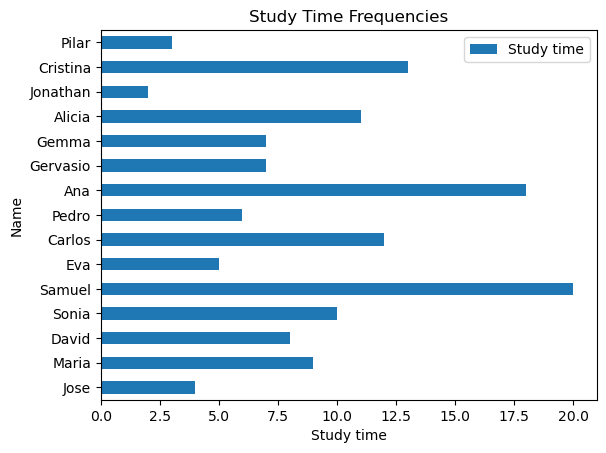

In [105]:
time_grades.plot.barh(x='Name', y='Study time')
plt.xlabel('Study time')
plt.ylabel('Name')
plt.title('Study Time Frequencies')
plt.show()

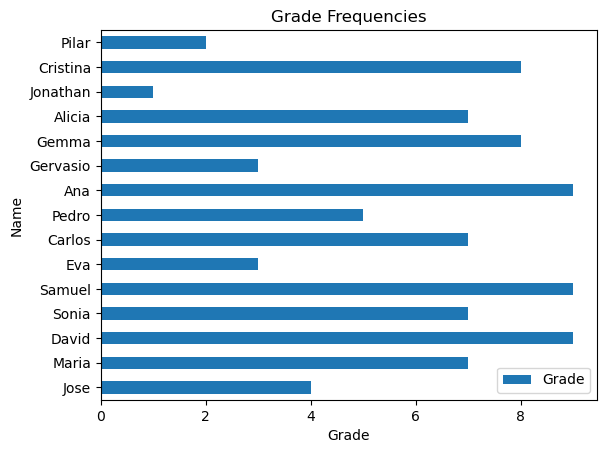

In [106]:
time_grades.plot.barh(x='Name', y='Grade')
plt.xlabel('Grade')
plt.ylabel('Name')
plt.title('Grade Frequencies')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [108]:
#Pearson's coefficient
correlation_pearson = time_grades['Study time'].corr(time_grades['Grade'])
correlation_pearson


spearman 

0.7980456073578858

In [109]:
#Spearman's coefficient
correlation_spearman = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
correlation_spearman

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

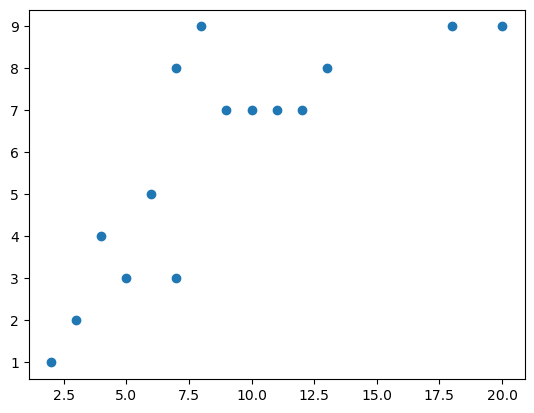

In [110]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

According to the correlation coefficients and the scatter plot, we can guess that the variables 'Study time' and 'Grades' are correlated, being directly proportional.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

- Pearson's coefficient is an indicator to find correlations of two variables by a linear function.
- Spearman's coefficient is an indicator to find correlations of two variables by a monotone function, not necessarily linear.